# Deep Pose Alignment

Transform and align a human pose captured from images or videos to a standard front-facing camera perspective. Pose data must be extracted using https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation to fit this model input shape

In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow.keras.layers import Dense
from tensorflow.compat.v1 import placeholder, Session, global_variables_initializer
from tensorflow.keras.layers import Flatten
from tensorflow import math
import numpy as np
from matplotlib import pyplot as plt
from utilities import *
from PoseAlignModel import PoseAlignModel
from sklearn.model_selection import train_test_split
import pickle

Instructions for updating:
non-resource variables are not supported in the long term


## Load and process pose data

In [2]:
wko = np.loadtxt('posedata.txt', delimiter=',')
##reshape the data
poses = wko.reshape(wko.shape[0],18,2)[:,:14,:]
##filter to only full-body poses
fb = poses[np.all(poses.reshape(poses.shape[0], 28) != -1, axis=1)]
fb = fb.reshape(fb.shape[0],14,2)
#centerizing the poses
centers = fb.mean(axis=1)
allposes = fb - np.repeat(centers, repeats=fb.shape[1],axis=0).reshape(fb.shape)
#split train-test
train, test = train_test_split(allposes, test_size=0.2)
train.shape, test.shape

((480, 14, 2), (113, 14, 2))

## Build model

In [4]:
pam = PoseAlignModel(fb.shape, [42,42,42,42])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Training

In [ ]:
n_shuffle = 100
s_epoch = 1000

for s in range(n_shuffle):
    print('shuffle', s)
    rposes = randomize_set(train, 0.5, 0.5)
    pam.train(rposes,train,s_epoch,1e-5)

## Getting training and testing MSE

#### Training

In [30]:
omse = []
pmse = []
for _ in range(50):
    rposes = randomize_set(train, 0.5, 0.5)
    pposes = pam.align(rposes,train)
    omse.append(((train - rposes)**2).mean())
    pmse.append(((train - pposes)**2).mean())
    
print(np.mean(omse))
print(np.mean(pmse))

0.0019139276867490612
0.0005388544777087832


#### Testing

In [38]:
omse = []
pmse = []
for _ in range(50):
    rposes = randomize_set(test, 0.5, 0.5)
    pposes = pam.align(rposes,test)
    omse.append(((test - rposes)**2).mean())
    pmse.append(((test - pposes)**2).mean())
    
print(np.mean(omse))
print(np.mean(pmse))

0.0018037250193961355
0.0005688185887621542


### Visualization

Randomly rotate a pose, fix it, then overlay the fixed pose on the original one

In [47]:
rposes = randomize_set(train, 0.5, 0.5)
pposes = pam.align(rposes,train)

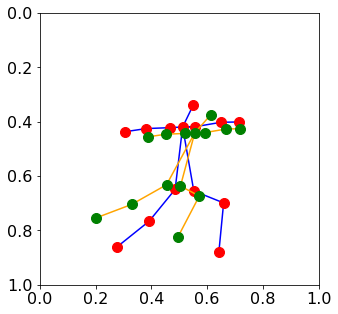

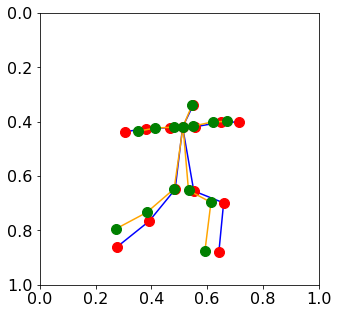

In [102]:
i = 180
overlay_pose(fb[i], rposes[i] + centers[i])
overlay_pose(fb[i], pposes[i] + centers[i])